# Initialize Notebook

**Scope of this notebook:** I will only proceed with importing the neccesary libraries and dataset to perform a quick EDA

In [2]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# Import dataset
dataset = pd.read_csv("C:/Users/steve/Desktop/Notebooks/Thesis-Project/Datasets/Raw/ADNI(Rawdata).csv")

## Data Inspection

In [4]:
# Check column names in case 
# we need to do some spelling correction
dataset.columns

Index(['RID', 'Gender', 'Ageatscreening', 'Diagnosis', 'MMSE0m',
       'HipsASMbaseline', 'HipsContrastbaseline', 'HipsCorelationbaseline',
       'HipsVariancebaseline', 'HipsSumAveragebaseline',
       'HipsSumVariancebaseline', 'HipsEntropybaseline',
       'HipsClusterShadebaseline', 'ERCsASMbaseline', 'ERCsContrastbaseline',
       'ERCsCorelationbaseline', 'ERCsVariancebaseline',
       'ERCsSumAveragebaseline', 'ERCsSumVariancebaseline',
       'ERCsEntropybaseline', 'ERCsClusterShadebaseline',
       'ERCs_thicknessbaseline', 'ERCsVolumebaseline',
       'HipposcampusVolumebaseline'],
      dtype='object')

In [5]:
# Check dataset overall information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RID                         608 non-null    int64  
 1   Gender                      608 non-null    int64  
 2   Ageatscreening              608 non-null    float64
 3   Diagnosis                   608 non-null    int64  
 4   MMSE0m                      605 non-null    float64
 5   HipsASMbaseline             583 non-null    float64
 6   HipsContrastbaseline        594 non-null    float64
 7   HipsCorelationbaseline      588 non-null    float64
 8   HipsVariancebaseline        600 non-null    float64
 9   HipsSumAveragebaseline      607 non-null    float64
 10  HipsSumVariancebaseline     601 non-null    float64
 11  HipsEntropybaseline         585 non-null    float64
 12  HipsClusterShadebaseline    590 non-null    float64
 13  ERCsASMbaseline             604 non

In [6]:
# Check for nulls
dataset.isna().sum()

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
MMSE0m                         3
HipsASMbaseline               25
HipsContrastbaseline          14
HipsCorelationbaseline        20
HipsVariancebaseline           8
HipsSumAveragebaseline         1
HipsSumVariancebaseline        7
HipsEntropybaseline           23
HipsClusterShadebaseline      18
ERCsASMbaseline                4
ERCsContrastbaseline          18
ERCsCorelationbaseline        28
ERCsVariancebaseline          14
ERCsSumAveragebaseline        11
ERCsSumVariancebaseline       13
ERCsEntropybaseline            9
ERCsClusterShadebaseline      34
ERCs_thicknessbaseline        37
ERCsVolumebaseline            14
HipposcampusVolumebaseline    19
dtype: int64

<Axes: >

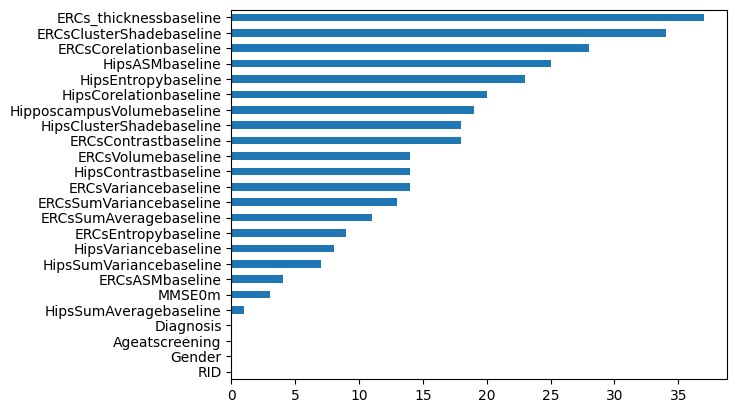

In [7]:
missing_data = dataset.isna().sum().sort_values()
missing_data.plot(kind='barh')

In [8]:
# Check for duplicated instances
dataset.duplicated().sum()

np.int64(0)

In [9]:
# Quick descriptive overview
dataset.describe(include = "all")

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
count,608.000000,608.000000,608.000000,608.000000,605.000000,583.000000,594.000000,588.000000,600.000000,607.000000,...,590.000000,580.000000,594.000000,597.000000,595.000000,599.000000,574.000000,571.000000,594.000000,589.000000
mean,732.986842,0.453947,75.492206,1.246711,26.852893,0.116003,179.069158,0.540629,200.456833,38.803855,...,226.470373,0.490707,222.096700,30.116097,660.464773,2.931352,1531.264216,2.771926,1697.378788,3223.843803
std,399.174416,0.498285,6.689691,1.119686,2.739189,0.040795,20.671230,0.050105,24.725191,5.032667,...,24.052848,0.047388,9.942083,3.232780,37.561281,0.209283,3084.641172,0.321123,391.721129,516.377557
min,2.000000,0.000000,55.205500,0.000000,16.000000,0.050000,122.020000,0.410000,129.360000,25.640000,...,163.010000,0.360000,195.940000,22.250000,554.630000,2.370000,-4665.130000,1.930000,830.000000,1782.000000
25%,416.750000,0.000000,71.452075,0.000000,25.000000,0.080000,164.747500,0.510000,183.615000,35.715000,...,209.862500,0.460000,215.775000,27.870000,635.670000,2.800000,-843.925000,2.560000,1398.250000,2828.000000
50%,751.500000,0.000000,75.706850,1.000000,27.000000,0.110000,178.710000,0.550000,207.025000,38.860000,...,224.710000,0.490000,222.540000,29.950000,664.470000,2.930000,1016.430000,2.780000,1706.500000,3225.000000
75%,1067.000000,1.000000,80.208925,2.000000,29.000000,0.140000,193.230000,0.580000,219.967500,42.495000,...,242.180000,0.530000,229.410000,32.290000,689.560000,3.080000,3605.522500,2.970000,2005.750000,3603.000000
max,1427.000000,1.000000,90.989000,3.000000,30.000000,0.230000,235.890000,0.680000,247.020000,51.890000,...,290.400000,0.600000,249.930000,38.930000,755.270000,3.500000,10334.290000,3.600000,2750.000000,4605.000000


## Target analysis

Lets have a quick look at the target

In [10]:
dataset["Diagnosis"].value_counts().sort_values()

Diagnosis
2     84
3    130
0    194
1    200
Name: count, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='count'>

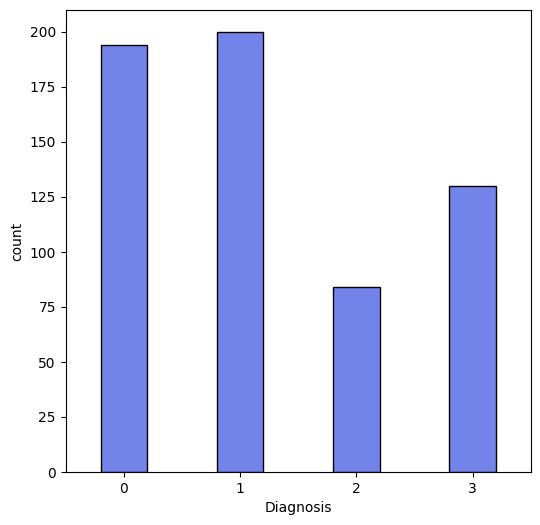

In [11]:
# Plot the target using a bar plot
plt.figure(figsize = (6,6))

sns.countplot(data = dataset, 
              x = dataset["Diagnosis"].sort_index(),
              color = "#5e76fe",
              width = 0.4,
              edgecolor = "black")

**We can see at first glance that we have an imbalance dataset.** 

## Diving deeper 
From our previous meeting, **column E was MMSE0m** and it was stated that it is an important variable. So we will pay extra attention to that variable.

As such, how about we check
* Q1) Total unique values for each MMSE0m score?
* Q2) Total values for each MMSE0m score per group?
* Q3) Total number of diagnosed people by gender?
* Q4) Total number of males and females who took the MMSE0m
* Q5) Total number of diagnosed people by gender and MMSE0m

**Q1) Total unique values for each MMSE0m score?**

<Axes: ylabel='MMSE0m'>

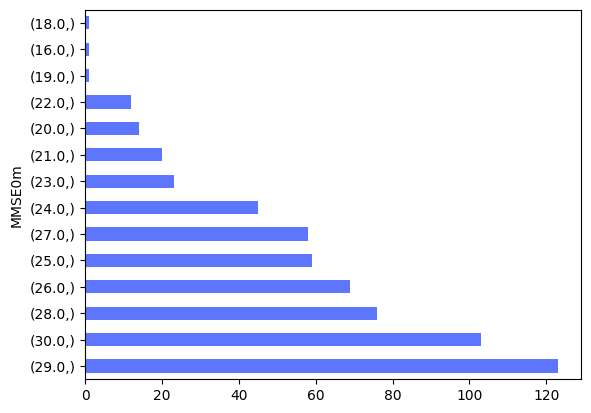

In [12]:
# Check for unique values in MMSE0m 
dataset[["MMSE0m"]].value_counts().sort_values(ascending = False).plot(kind ="barh",
                                                                       color="#5e76fe")

It appears that we have 14 unique values for MMSE0m scoring. Now how about we check the **MMSE0m** scores for each **Diagnosis** group

**Q2) Total values for each MMSE0m score per group?**

<Axes: ylabel='Diagnosis,MMSE0m'>

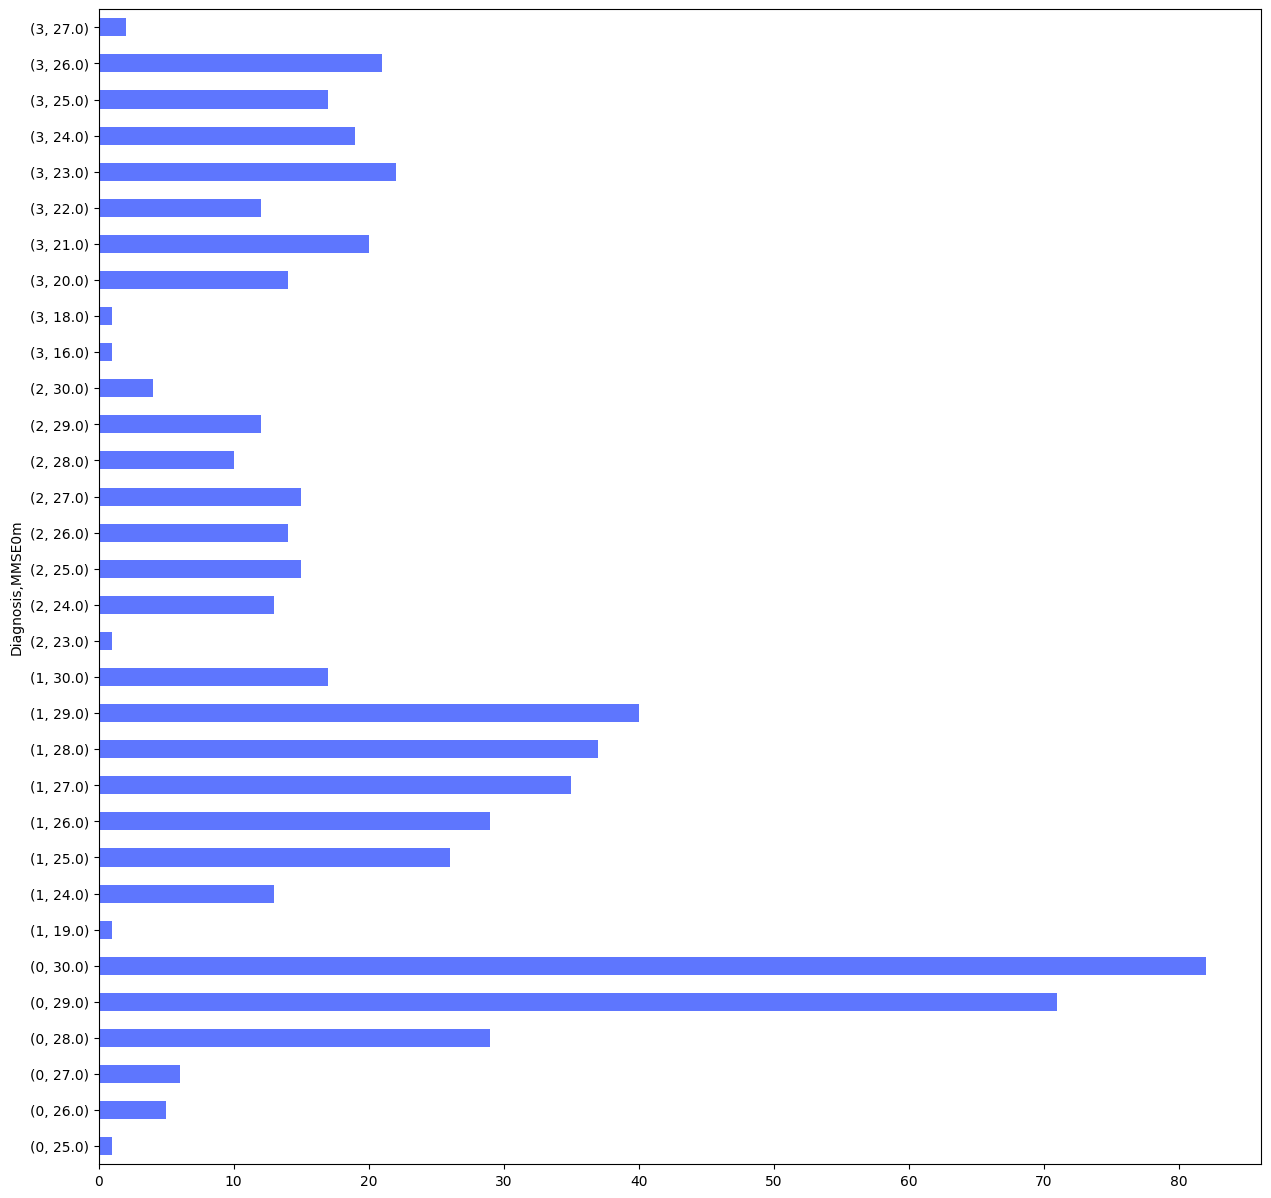

In [13]:
# Plot MMSE0m_counts per group
MMSE0m_counts = dataset.groupby(by = "Diagnosis")["MMSE0m"].value_counts().sort_index()

plt.figure(figsize=(15,15))

MMSE0m_counts.plot(kind = "barh",
                   color = "#5e76fe")

**Q3) Total number of diagnosed people by gender?**

<Axes: xlabel='Diagnosis', ylabel='count'>

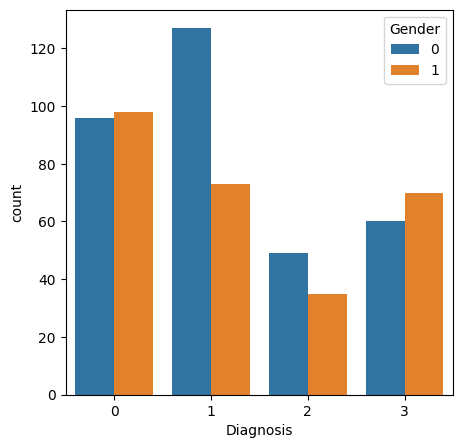

In [14]:
# Plot number of diagnosed people by gender
plt.figure(figsize=(5, 5))

sns.countplot(dataset, x = "Diagnosis", hue = "Gender")

**Q4) Total number of males and females who took the MMSE0m**

<Axes: xlabel='MMSE0m', ylabel='count'>

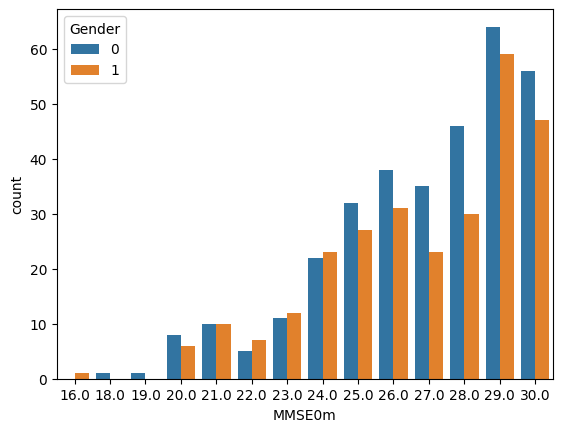

In [15]:
sns.countplot(data = dataset, x="MMSE0m", hue="Gender")

**Q5) Total number of diagnosed people by gender and MMSE0m**

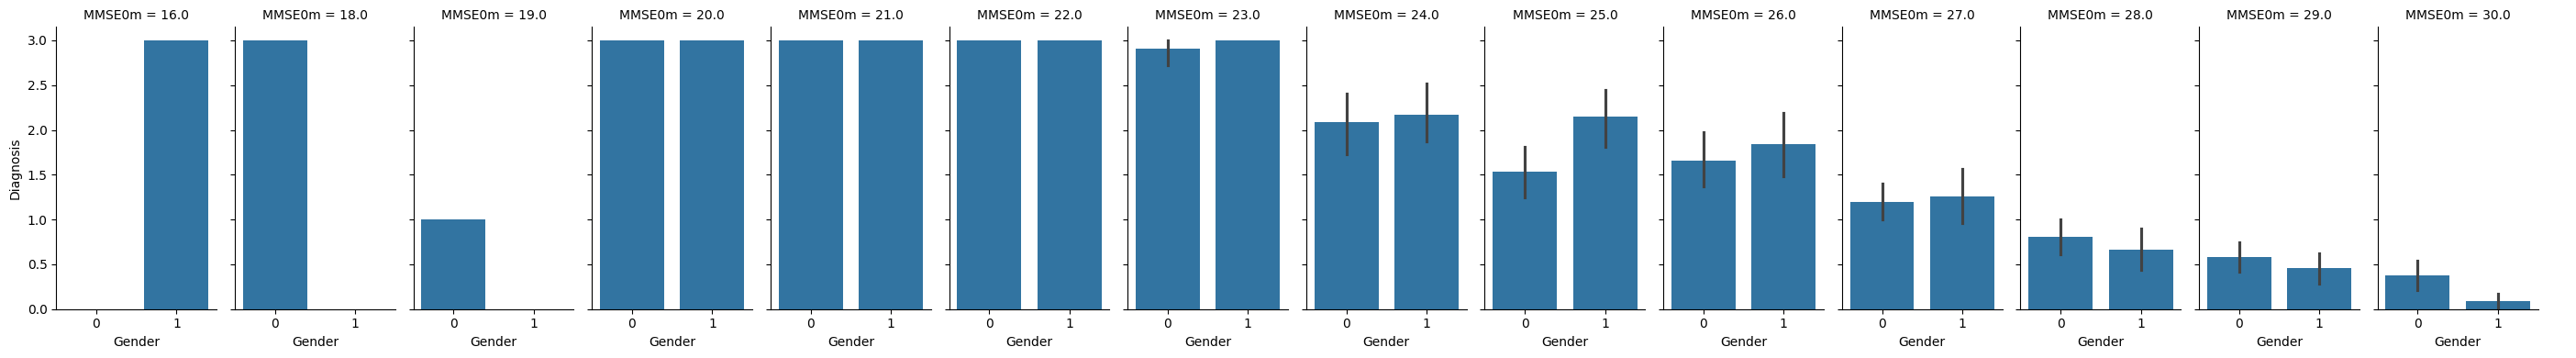

In [ ]:
# Plot the total number of males and females who took the MMSE0m
sns.catplot(data = dataset, 
            kind="bar", 
            x="Gender", 
            y="Diagnosis", 
            col="MMSE0m", 
            height=4, 
            aspect=.5,
)

Questions have been answered! Now lets move into a broader point of view.

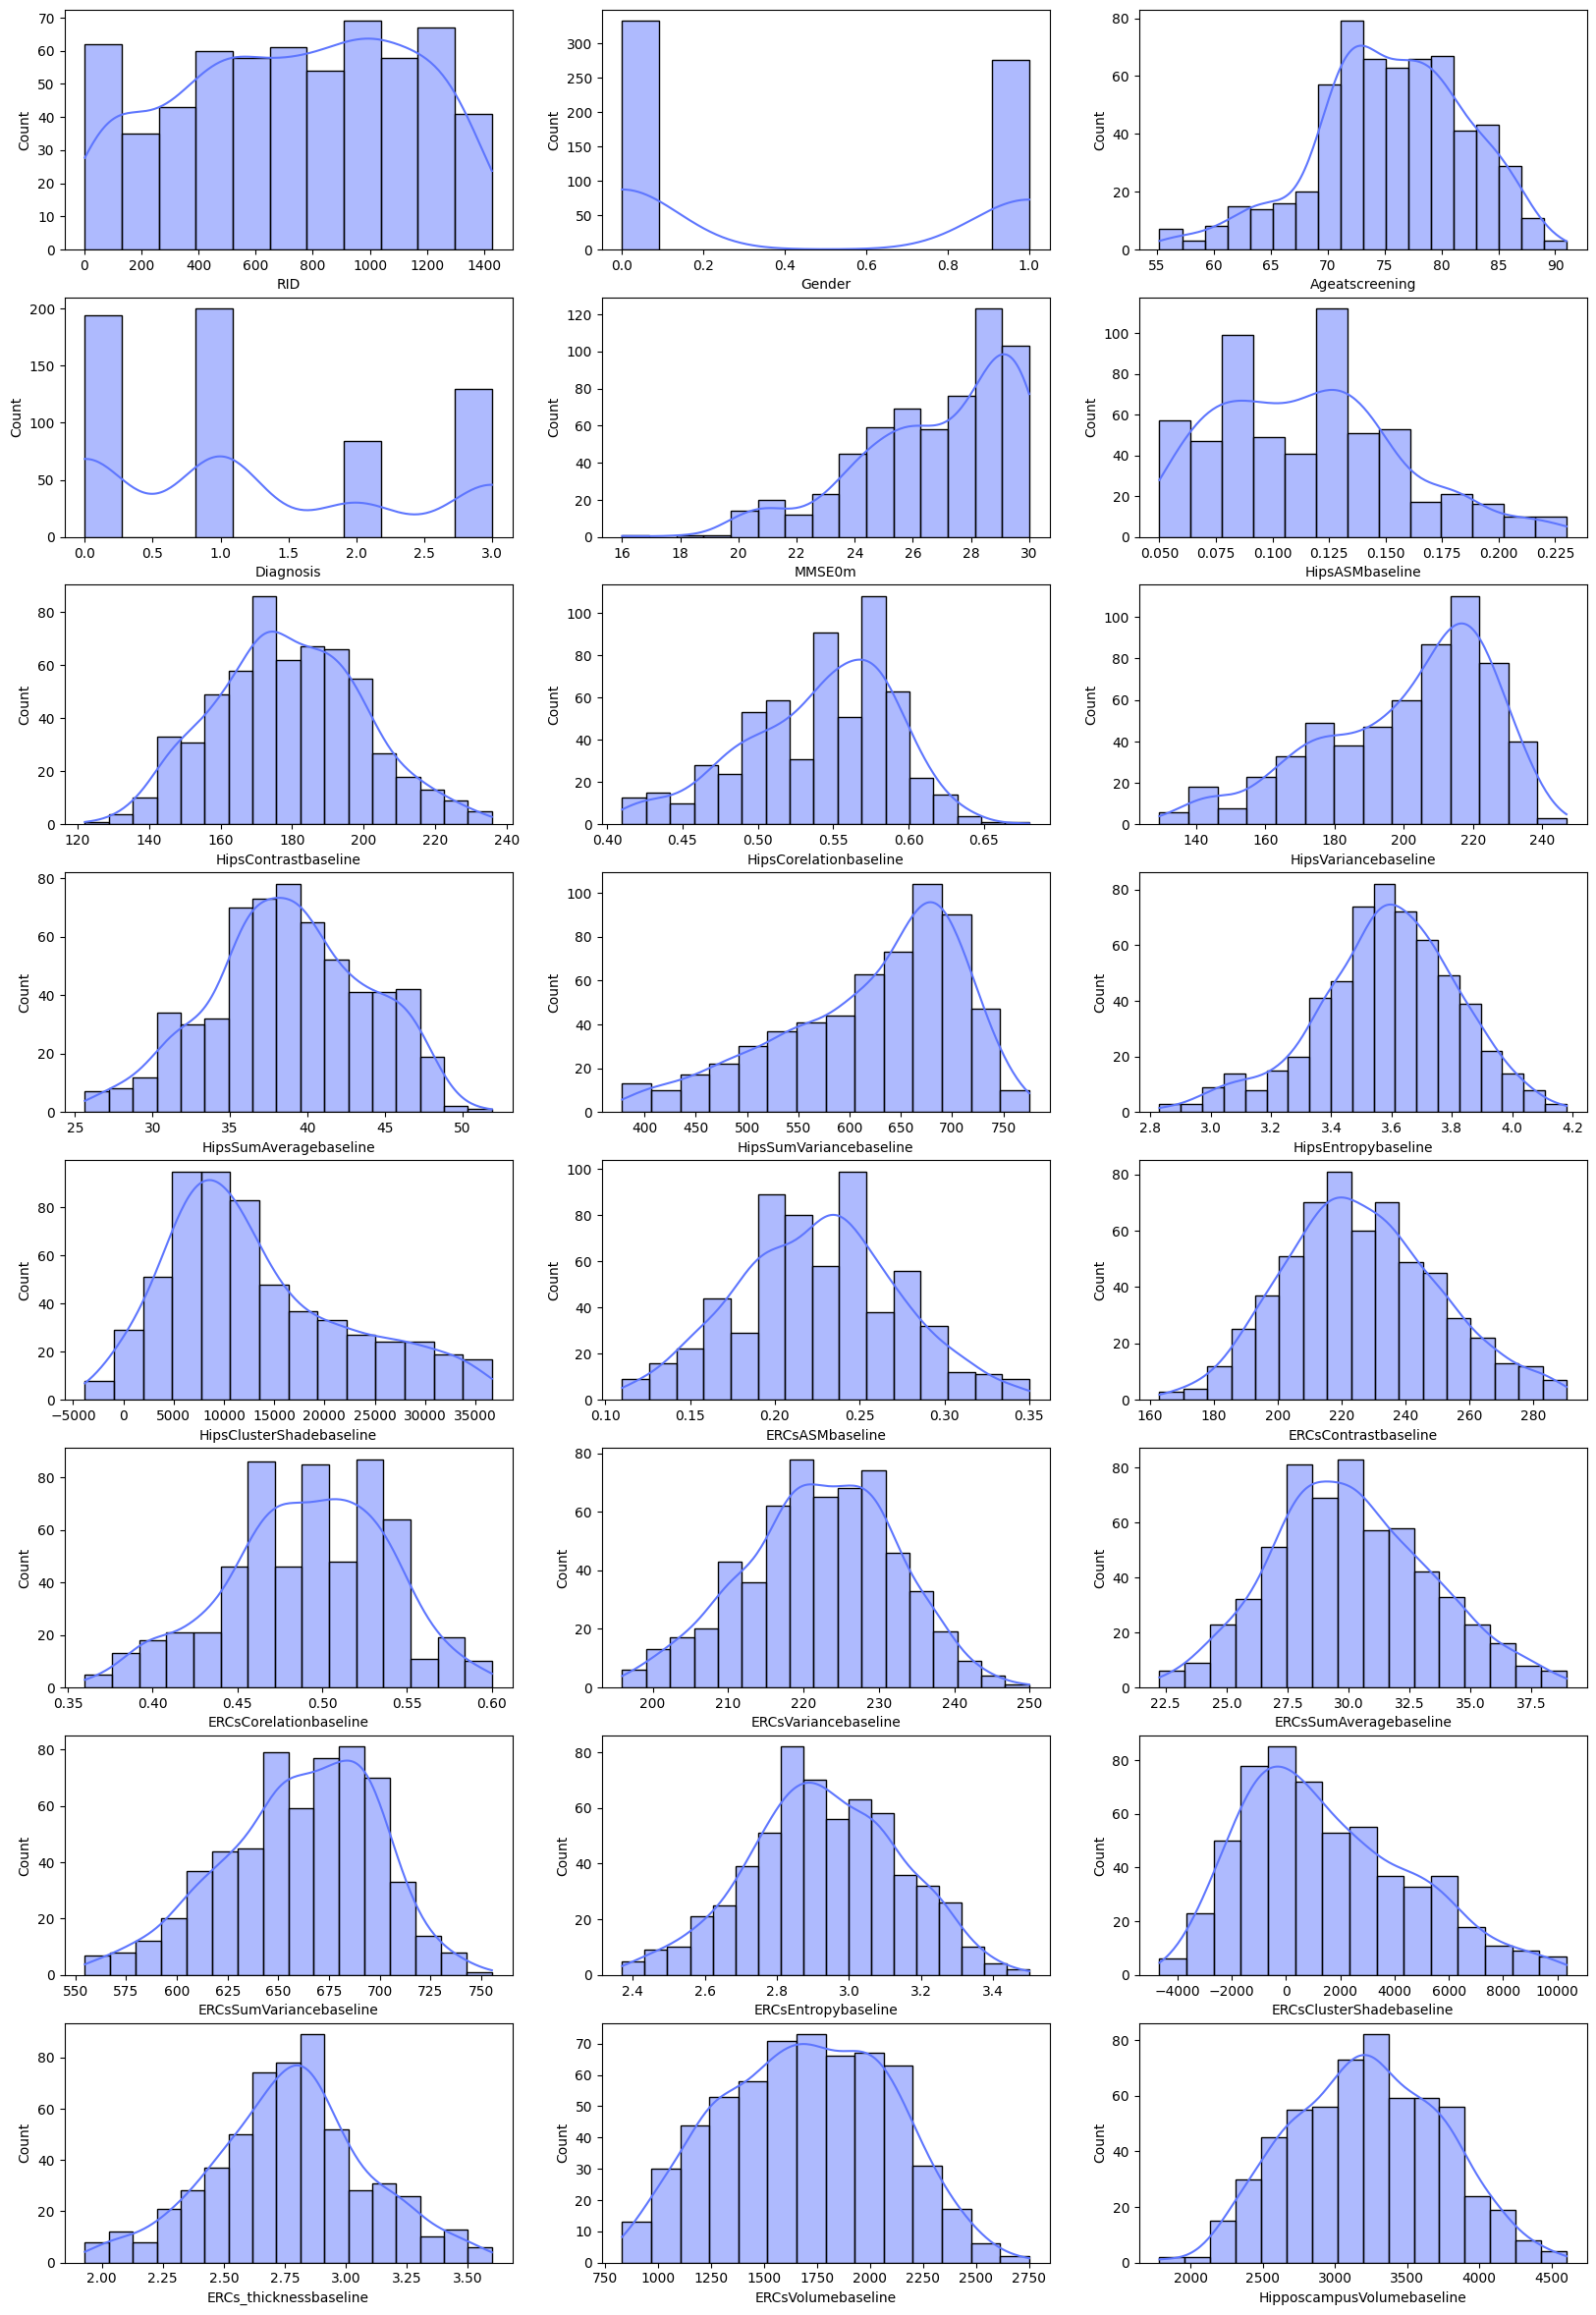

In [17]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(dataset[dataset.columns[i]], 
                 color="#5e76fe", 
                 kde = True,
                 edgecolor = "black")

Now we want to check for any outliers. How about we use boxplots?

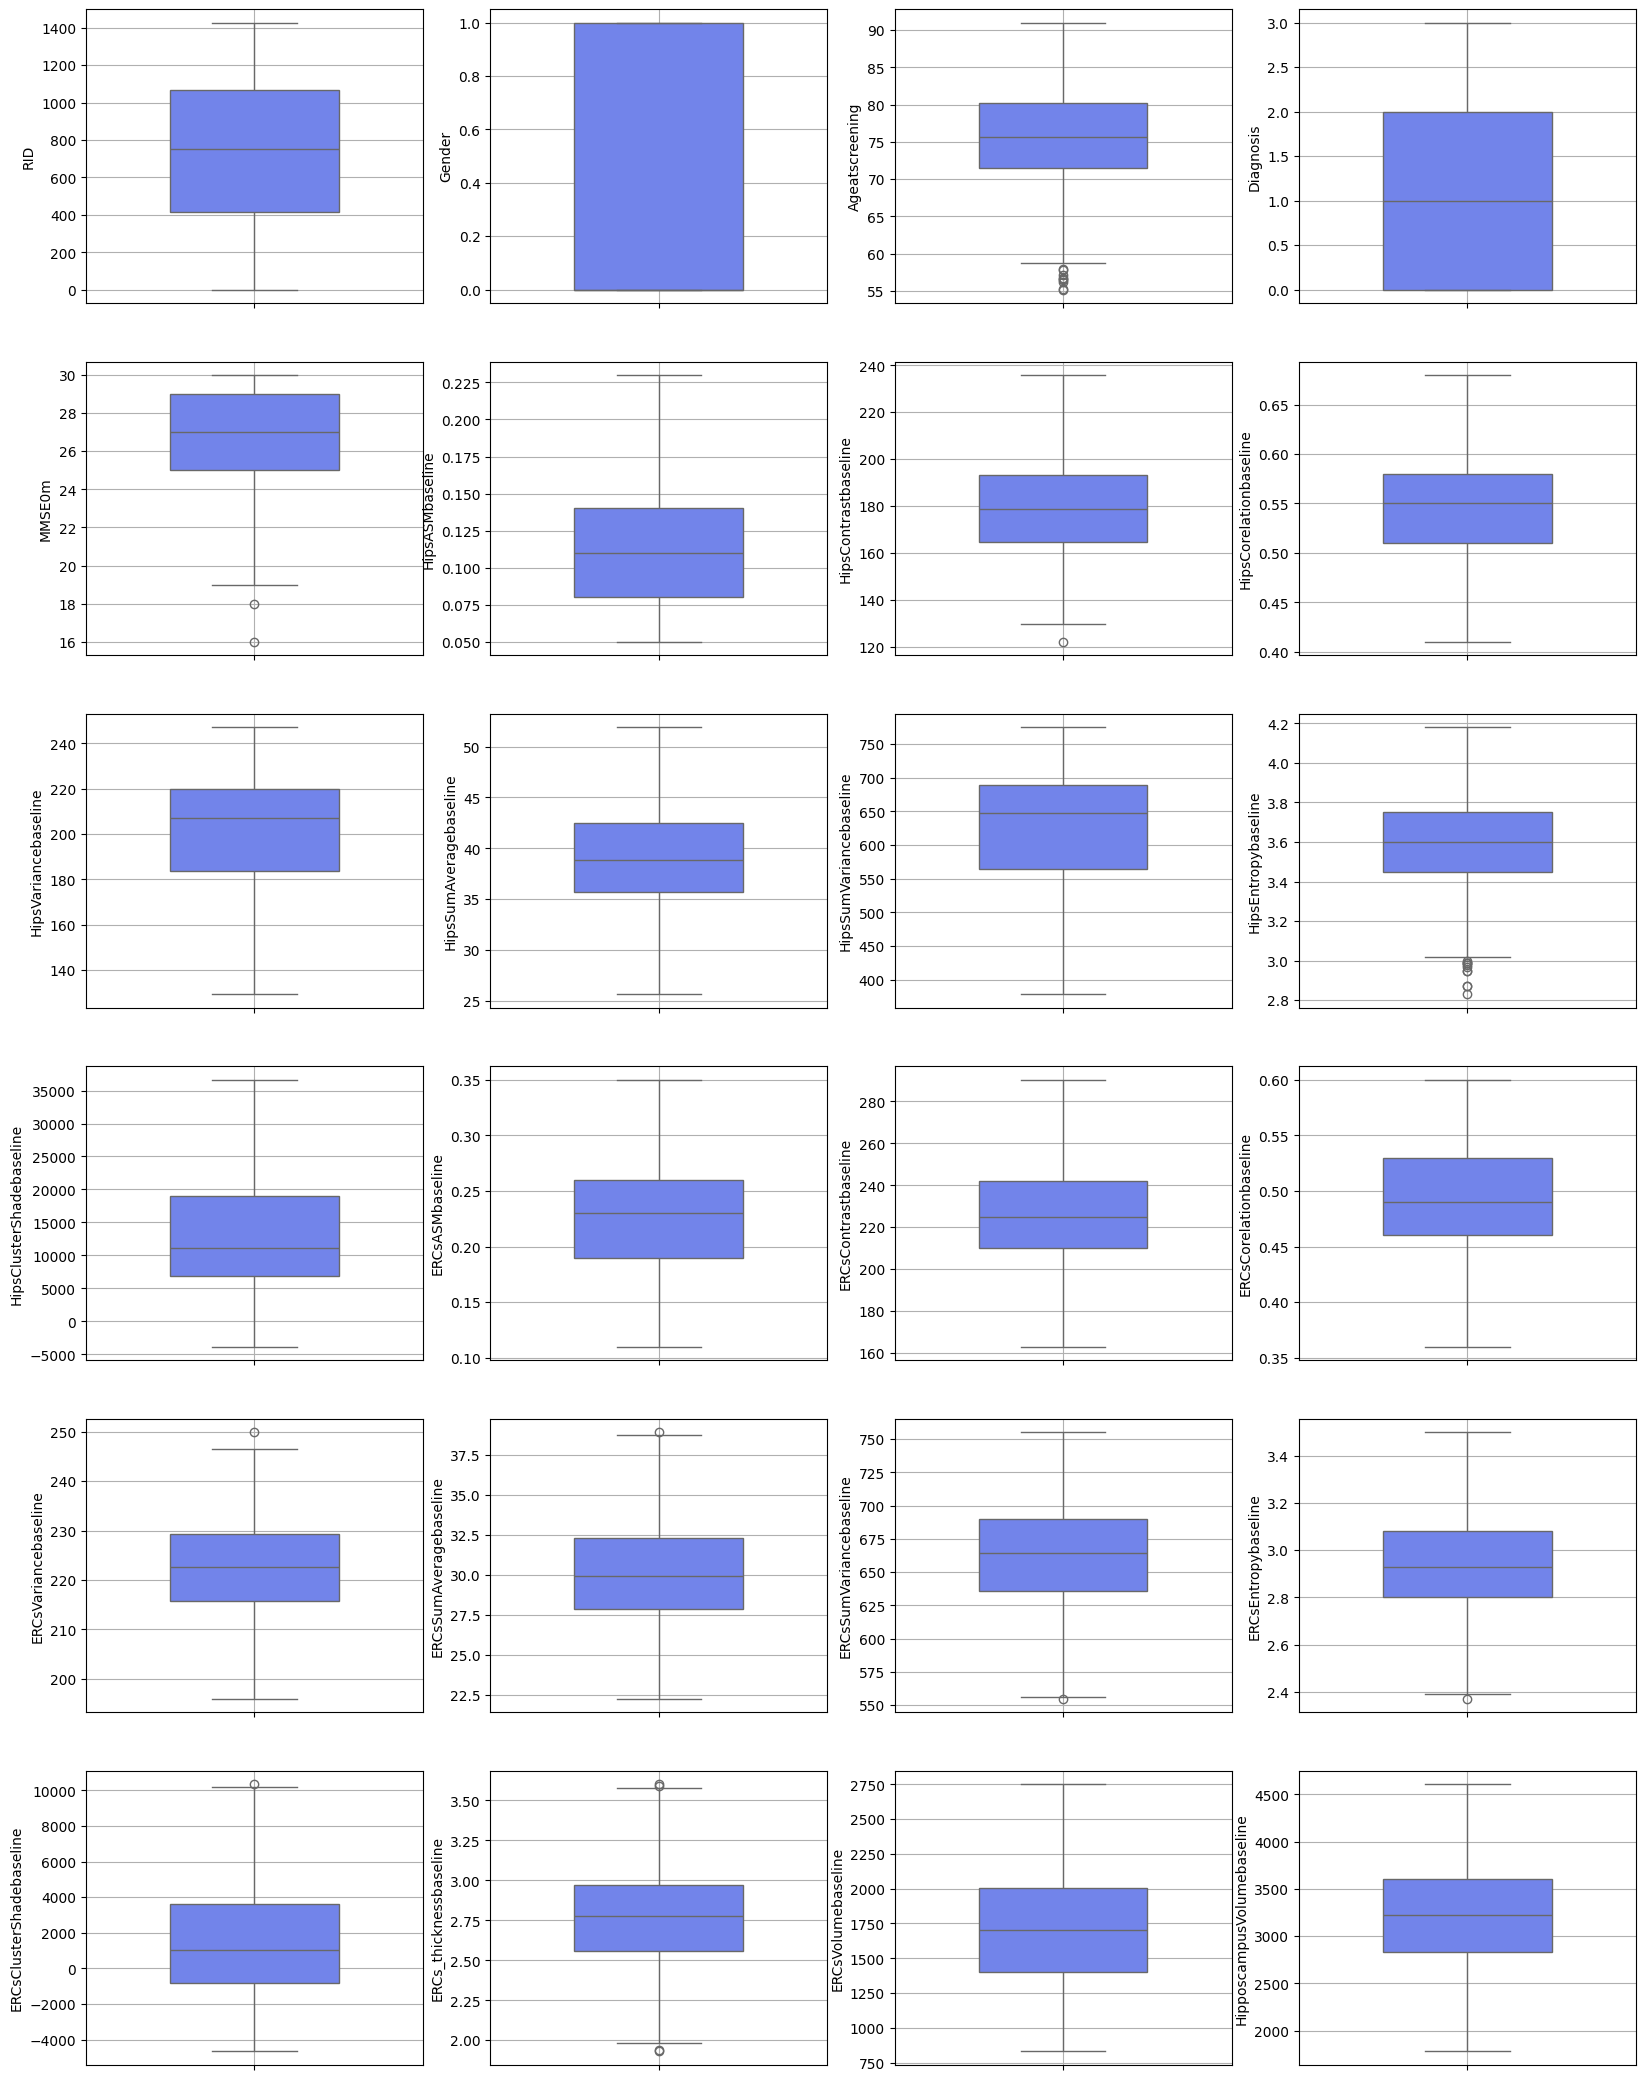

In [18]:
# Plot each column using boxplot
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(10,4,i+1)
    sns.boxplot(dataset[dataset.columns[i]], 
                color="#5e76fe",
                width=.5)
    plt.grid()

We can now better understand the spread of our dataset and detect a few outliers from here. 

How about we check the Q-Q plot for each variable? Perhaps we can have a much better comprehension if the data follows a normal distribution aside from relying on the above histogram.

Note: *Q-Q plots rely on the complete dataset to compute quantiles. Therefore, i had to drop a few values to see the red line*

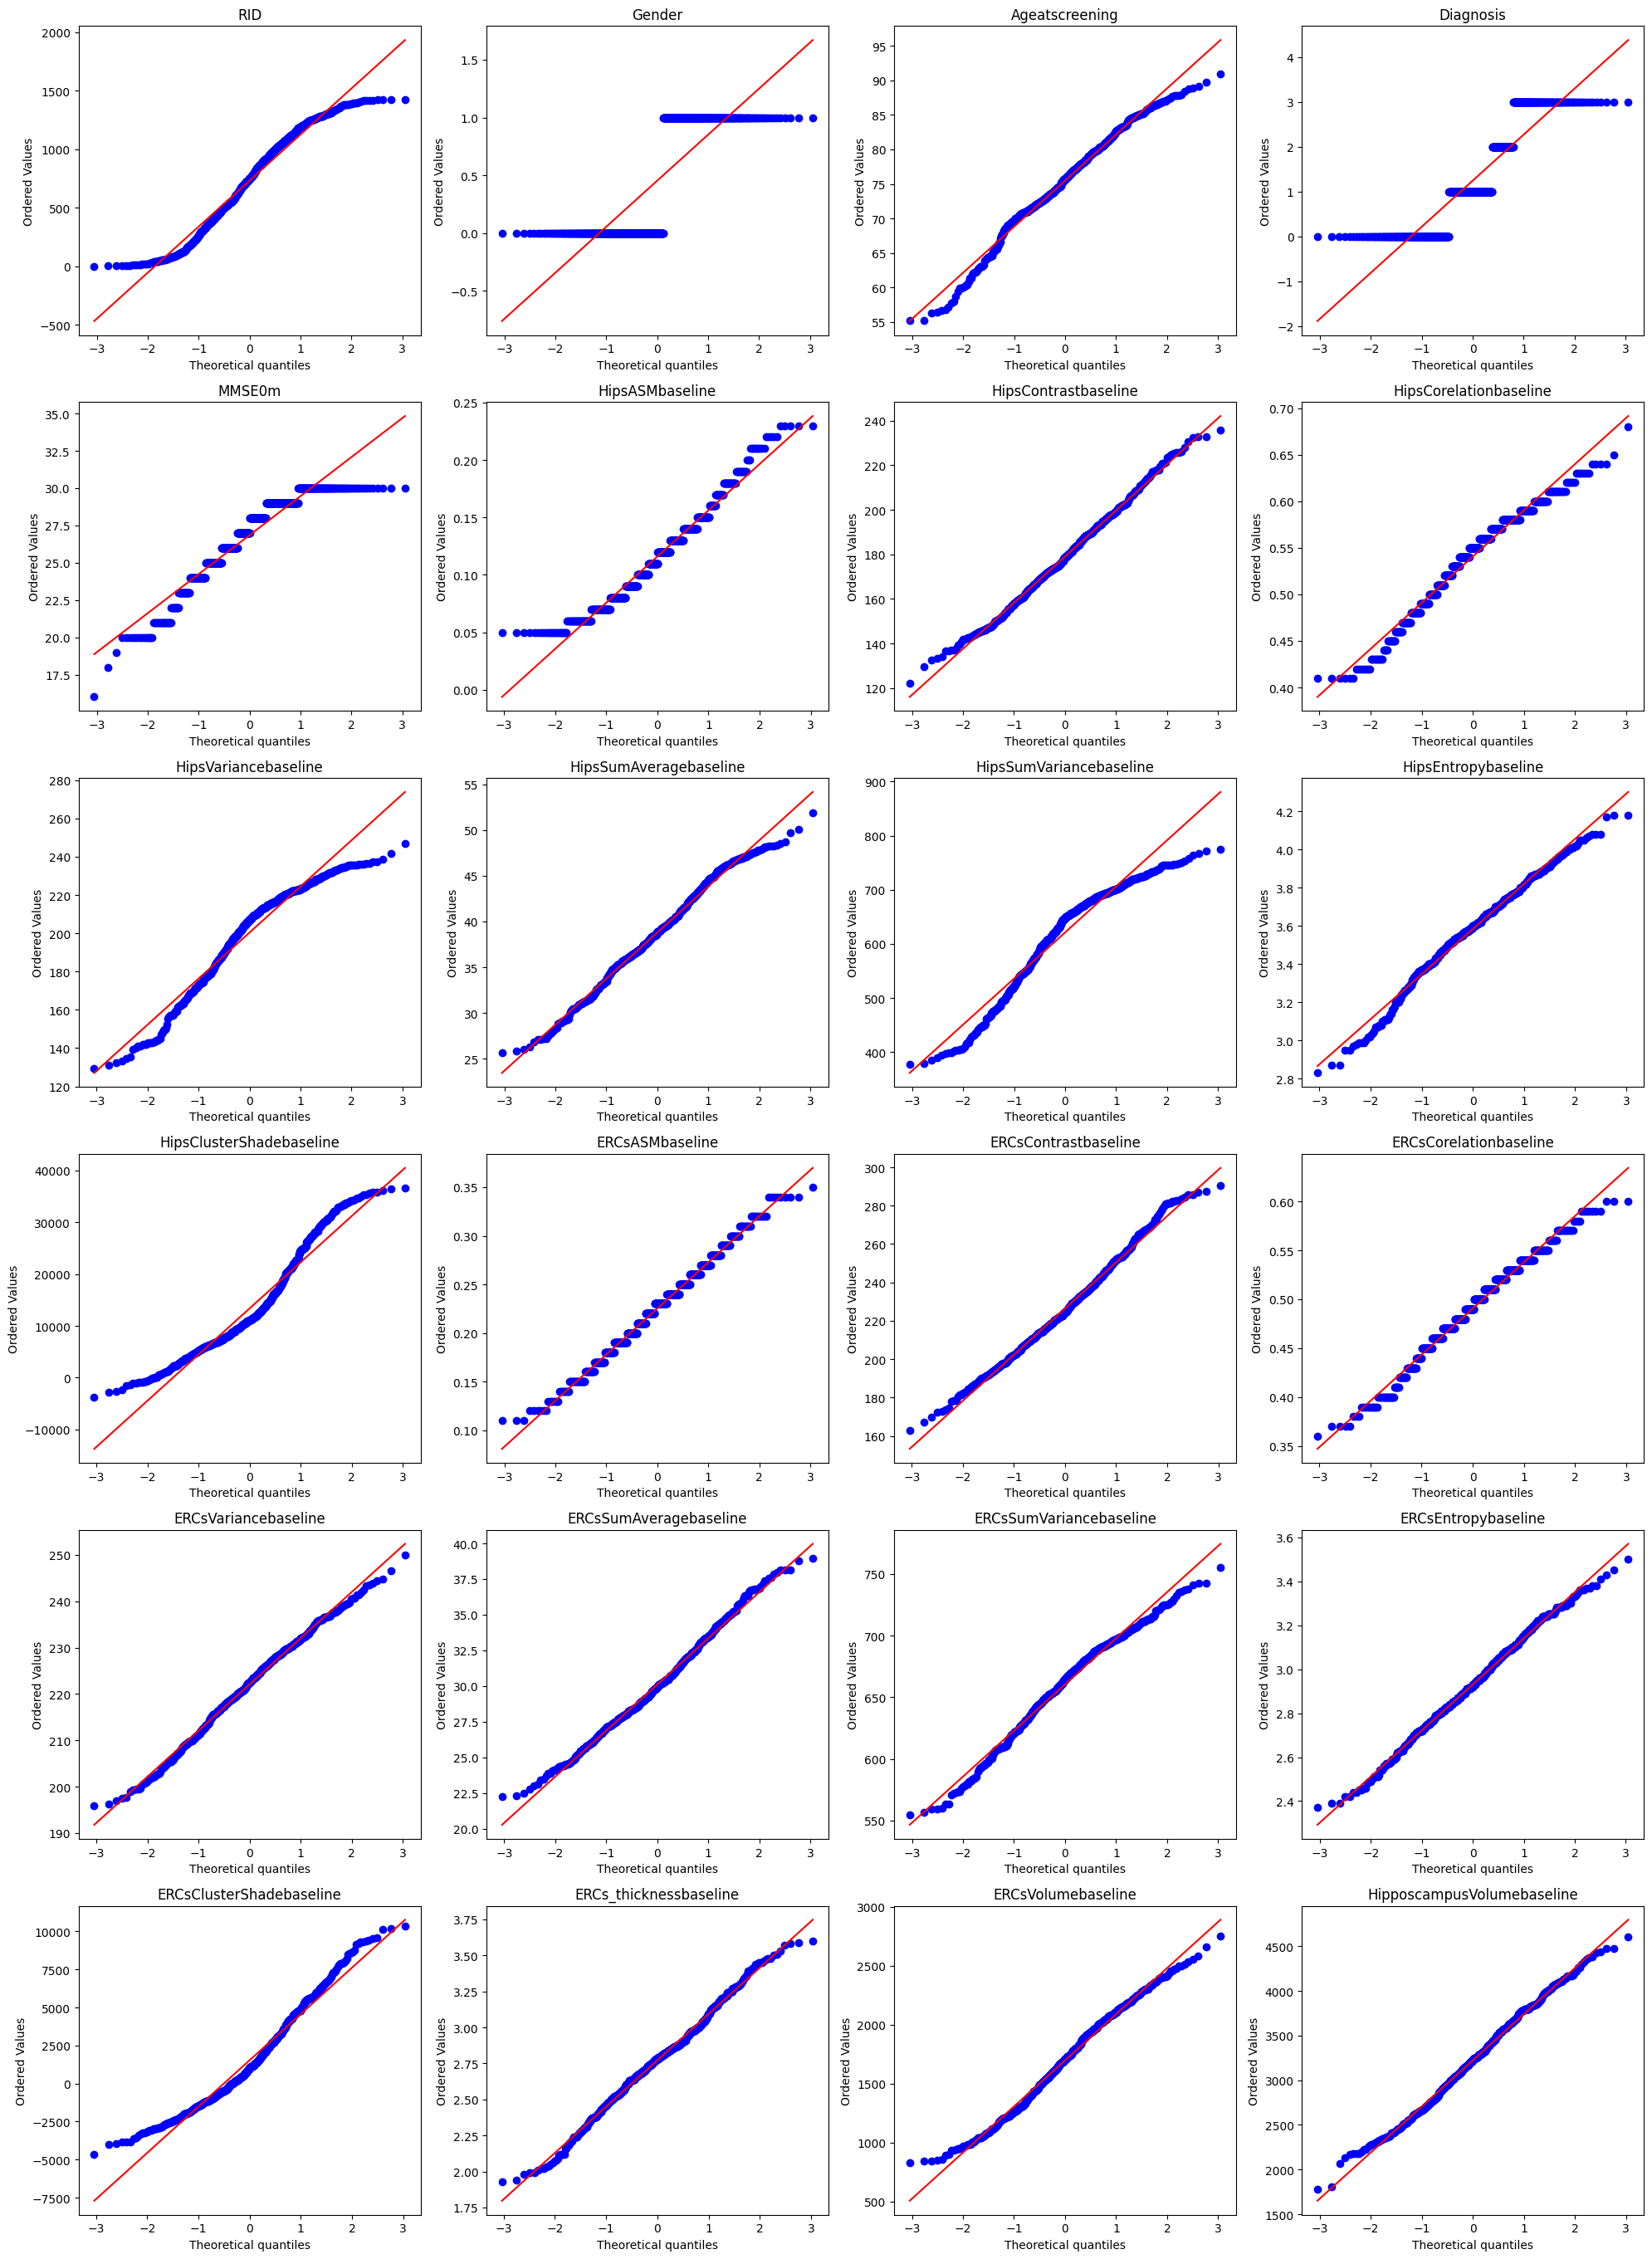

In [19]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(10, 4, i + 1)
    stats.probplot(dataset[dataset.columns[i]].dropna(), 
                   dist='norm', plot=plt)
    plt.title(dataset.columns[i])

plt.tight_layout()

 Interesing, it seems that most of the variables do follow a normal distribution.